<a href="https://colab.research.google.com/github/pgeorgant/pgeorgant.github.io/blob/main/interpolation_gaussian_with_bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [ ]:
# known model
class gaussian_model_with_bias:
    """"
    y = norm_pdf(x; mean, var) + bias + noise
    """
    def __init__(self, m, v, b):
        self.m = m
        self.v = v
        self.measure_noise_std = 0.05
        self.b = b

    def curve(self, x, m, v, b):
        return scipy.stats.norm.pdf(x, loc=m, scale=v) + b

    def measure(self, x):
        return self.curve(x,self.m,self.v,self.b) + np.random.randn(N)*self.measure_noise_std

In [ ]:
# synthetic data
model = gaussian_model_with_bias(1.0, .2, 10.)
N = 1000
x_data = np.linspace(-5,2,N)
y_data = model.measure(x_data)

In [ ]:
p = scipy.optimize.curve_fit(model.curve, x_data, y_data, p0=[1.,1.,1.])
est_mean, est_var, b= p[0]

In [ ]:
print(f'est. mean: {p[0][0]},\nest. var:{p[0][1]}\nest. bias:{p[0][2]}\nCovariamce of est.:\n{p[1]}')

est. mean: 0.9986824702962074,
est. var:0.20113795251245445
est. bias:9.999038402552713
Covariamce of est.:
[[ 1.01781242e-06 -3.56802059e-14  1.09452785e-12]
 [-3.56802059e-14  6.78541625e-07  3.64833582e-12]
 [ 1.09452785e-12  3.64833582e-12  2.51776852e-06]]


In [ ]:
# known model
fit_y_data = model.curve(x_data, est_mean, est_var, b)

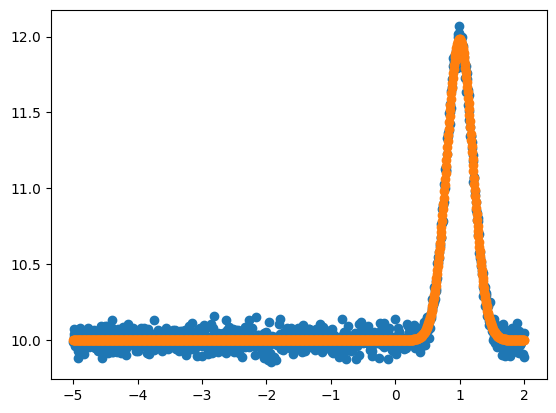

In [ ]:
plt.scatter(x_data, y_data)
plt.scatter(x_data, fit_y_data)